# Brain Tumor Classification (MRI)

# Importing modules

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import io
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History
from tensorflow import keras
from tensorflow.keras import layers

# Data processing

In [83]:
class_names = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
img_size = 150

X_train = []
y_train = []
X_test = []
y_test = []

# loading training data from directories
for i in class_names:
    folderPath = os.path.join('Data','Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(img_size, img_size))
        X_train.append(img)
        y_train.append(i)

# loading testing data from directories
for i in class_names:
    folderPath = os.path.join('Data','Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(img_size, img_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [84]:
print("Shape of train: ", X_train.shape,"Shape of test: ", X_test.shape)

Shape of train:  (2870, 150, 150, 3) Shape of test:  (394, 150, 150, 3)


In [85]:
# Scale pixels to range 0-1 and convert to floating point
X_train = X_train / 255.
X_test = X_test / 255.

X_train.dtype

dtype('float64')

# Some data visualizations

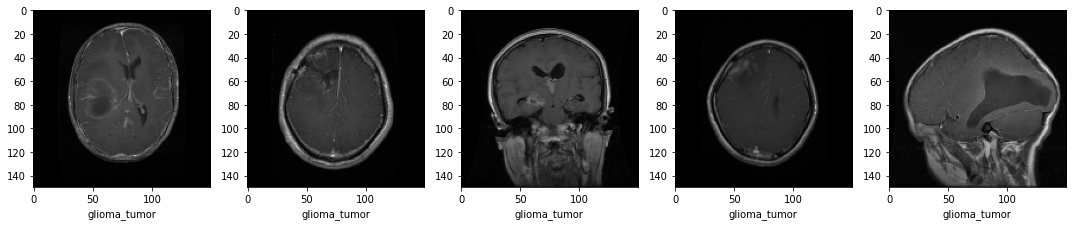

In [86]:
# sample images
plt.figure(figsize = (15,15));
for i,j in enumerate(X_train):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(y_train[i]);
        plt.tight_layout()
    else:
        break

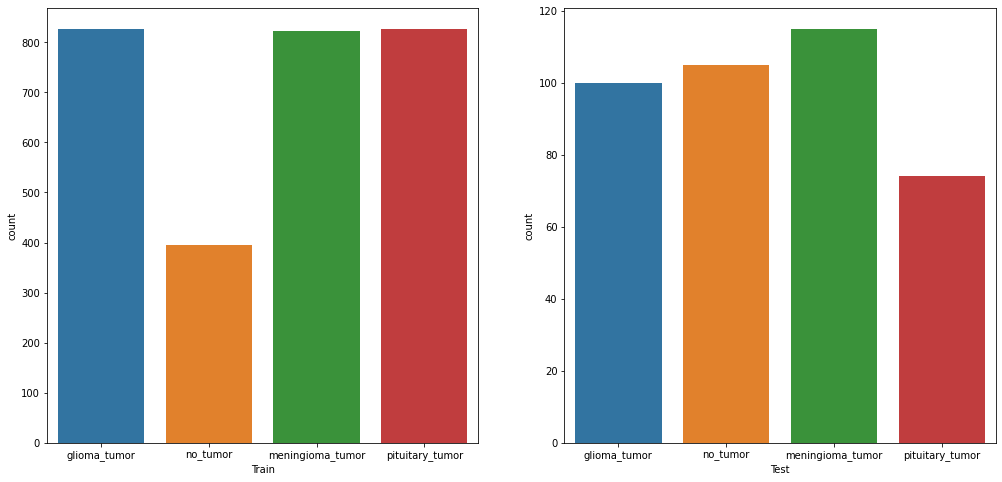

In [87]:
# A bar chart showing the distribution of the number of examples from each class, for training and test data
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

# Building models

CNN model

In [88]:
model = keras.Sequential(
    [
        keras.Input(shape=(150, 150, 3)),
     
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 33, 33, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)      

In [89]:
batch_size = 32
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_1 = model.fit(X_train, np.array(pd.get_dummies(y_train)), batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
81/81 [==============================] - 77s 946ms/step - loss: 1.1507 - accuracy: 0.4727 - val_loss: 1.0076 - val_accuracy: 0.7143
Epoch 2/20
81/81 [==============================] - 77s 957ms/step - loss: 0.8417 - accuracy: 0.6431 - val_loss: 0.4800 - val_accuracy: 0.9233
Epoch 3/20
81/81 [==============================] - 76s 937ms/step - loss: 0.7207 - accuracy: 0.6988 - val_loss: 0.5070 - val_accuracy: 0.8920
Epoch 4/20
81/81 [==============================] - 77s 952ms/step - loss: 0.5832 - accuracy: 0.7650 - val_loss: 0.3159 - val_accuracy: 0.9338
Epoch 5/20
81/81 [==============================] - 77s 946ms/step - loss: 0.4963 - accuracy: 0.8057 - val_loss: 0.3024 - val_accuracy: 0.9094
Epoch 6/20
81/81 [==============================] - 77s 945ms/step - loss: 0.4382 - accuracy: 0.8273 - val_loss: 0.2318 - val_accuracy: 0.9408
Epoch 7/20
81/81 [==============================] - 82s 1s/step - loss: 0.3829 - accuracy: 0.8568 - val_loss: 0.2564 - val_accuracy: 0.9233
Ep

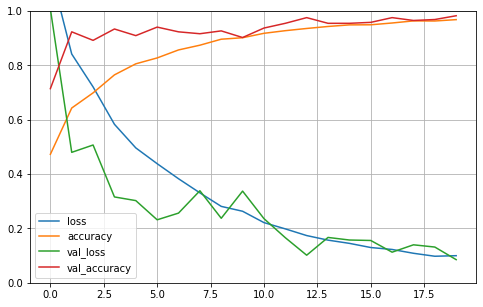

In [93]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [102]:
model.evaluate(X_test, np.array(pd.get_dummies(y_test)))

13/13 [==============================] - 3s 228ms/step - loss: 4.3435 - accuracy: 0.7259


[4.343474388122559, 0.7258883118629456]

DNN model

In [113]:
model_2 = keras.Sequential(
    [
        keras.Input(shape=(150, 150, 3)),
        layers.Dense(100,activation="sigmoid"),
        layers.Dense(50,activation="sigmoid"),
        layers.Dense(10,activation="sigmoid"),
        layers.Dense(4, activation="softmax"),
    ]
)

model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 150, 150, 100)     400       
                                                                 
 dense_31 (Dense)            (None, 150, 150, 50)      5050      
                                                                 
 dense_32 (Dense)            (None, 150, 150, 10)      510       
                                                                 
 dense_33 (Dense)            (None, 150, 150, 4)       44        
                                                                 
Total params: 6,004
Trainable params: 6,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 20

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_2 = model.fit(X_train, np.array(pd.get_dummies(y_train)), batch_size=batch_size, epochs=epochs, validation_split=0.1)

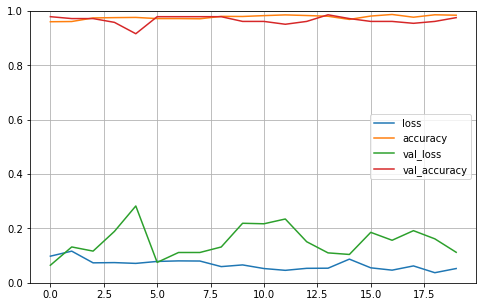

In [104]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_2.evaluate(X_test, np.array(pd.get_dummies(y_test))) # error

# Summary

Constructed and trained CNN showed quite poor accuracy. 
Constructed and trained DNN presents results showing that it cannot be used for effective prediction.